In [2]:
import pandas as pd

df= pd.read_csv('alcohol-consumption.csv')
df


,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
0,Estonia,16.9,15.8,1.1,32.7,7.4,50.3,9.6,11.5,11.9
1,Lithuania,15.0,13.8,1.2,43.6,7.3,37.1,12.1,14.4,13.9
2,Czech Republic,14.3,12.4,1.4,53.3,21.3,25.4,0.0,11.2,11.4
3,Seychelles,13.8,12.4,1.4,68.9,22.4,6.3,2.5,10.4,10.6
4,Germany,13.4,11.3,1.4,52.6,28.4,18.9,0.0,12.8,12.6
...,...,...,...,...,...,...,...,...,...,...
184,Bangladesh,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
185,Kuwait,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
186,Libya,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
187,Mauritania,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0


In [3]:
df.isnull().sum()

country                    0
total_consumption          0
recorded_consumption       0
unrecorded_consumption     0
beer_percentage           10
wine_percentage           10
spirits_percentage        10
other_percentage          10
2020_projection            0
2025_projection            0
dtype: int64

<AxesSubplot:>

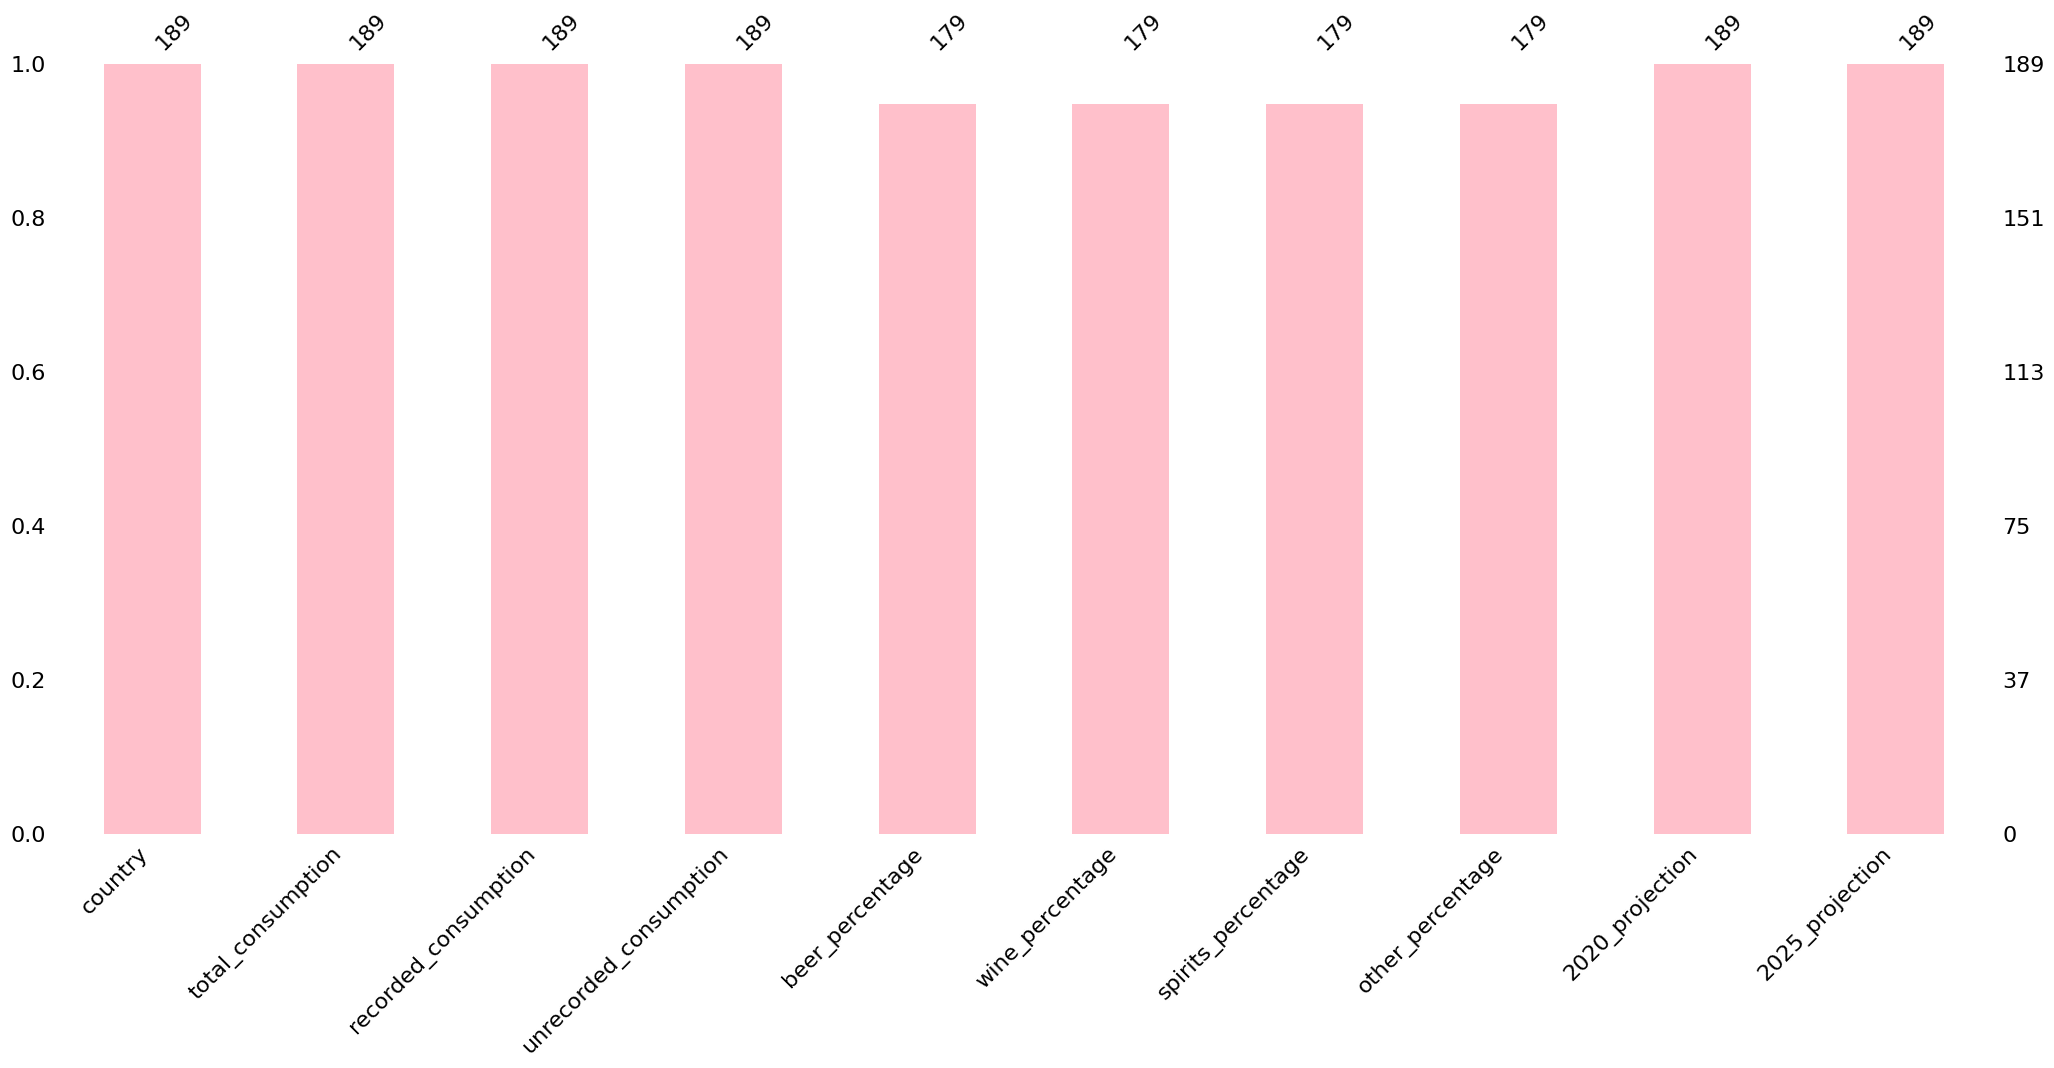

In [4]:
import missingno as mso
mso.bar(df, color='pink')


<AxesSubplot:>

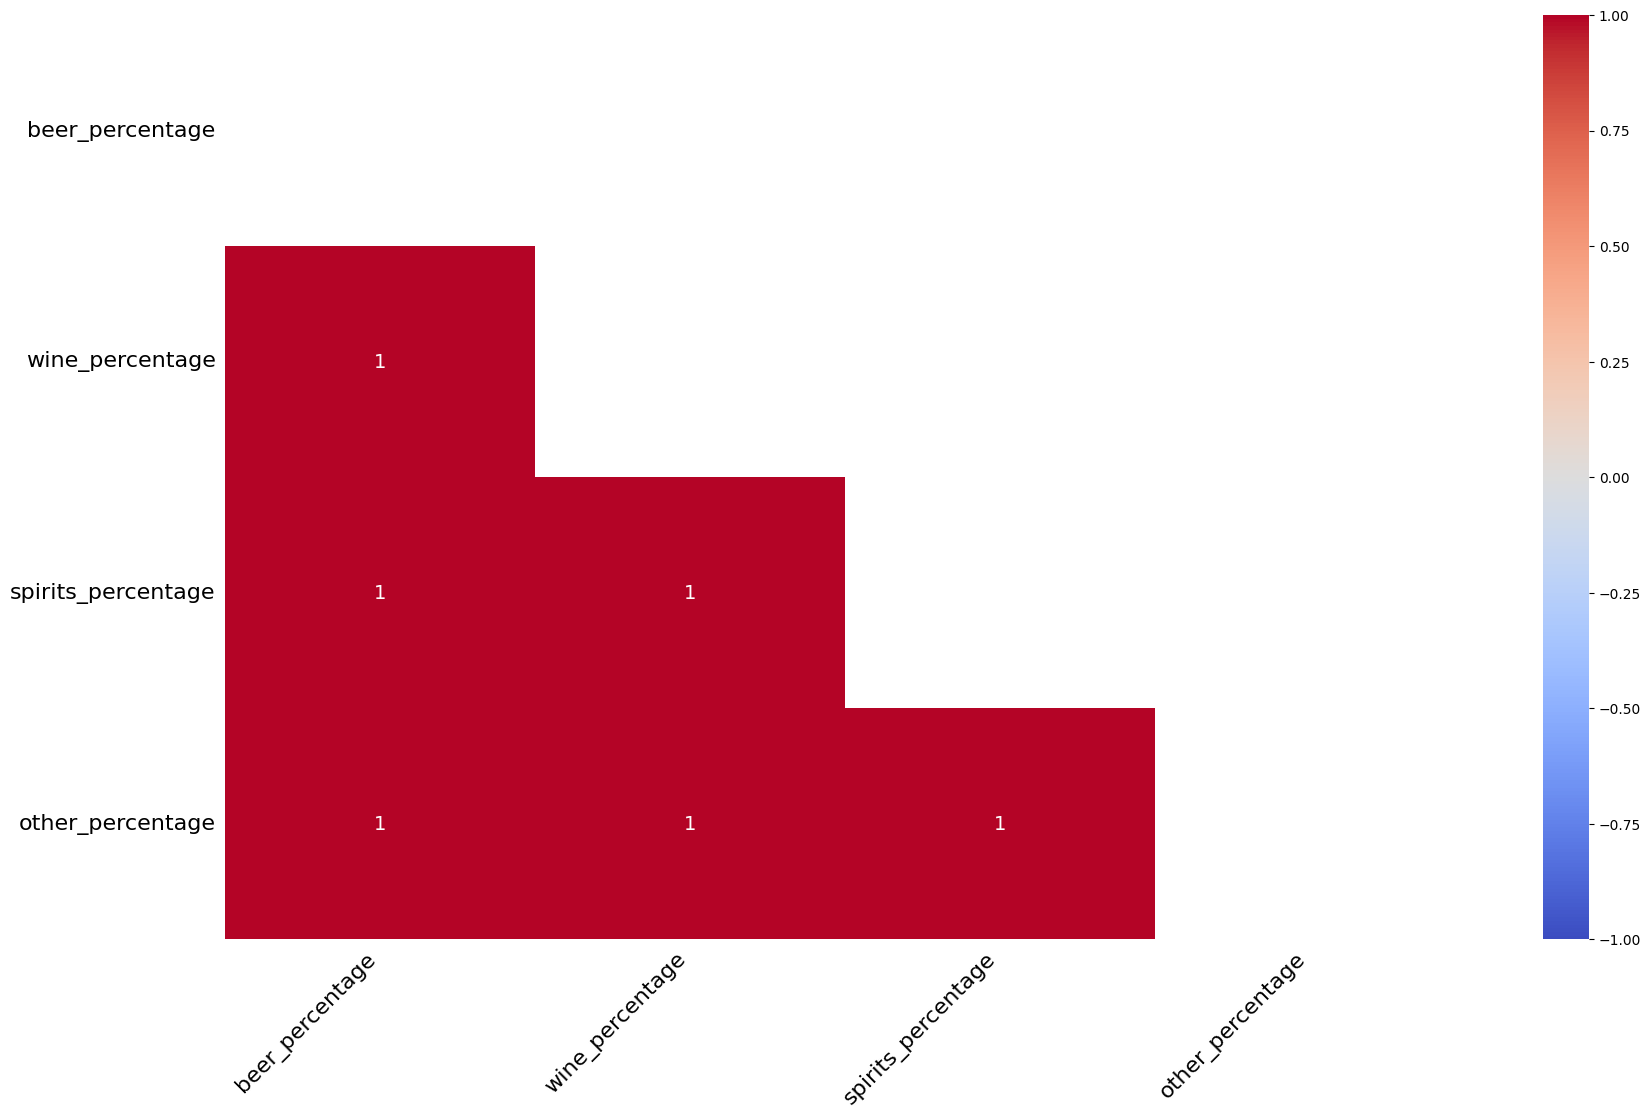

In [5]:
mso.heatmap(df, cmap='coolwarm')

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

country                   0
total_consumption         0
recorded_consumption      0
unrecorded_consumption    0
beer_percentage           0
wine_percentage           0
spirits_percentage        0
other_percentage          0
2020_projection           0
2025_projection           0
dtype: int64

In [7]:
df.describe()

,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage,2020_projection,2025_projection
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,6.516760,5.197765,1.444693,43.484358,16.306704,29.394413,10.807821,6.592737,6.802235
std,3.981989,3.689995,0.868495,22.147305,18.123067,24.027063,23.013580,3.945343,4.013292
min,0.100000,0.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,2.900000,1.650000,0.900000,28.300000,2.150000,10.850000,0.000000,3.150000,3.250000
50%,6.600000,4.900000,1.400000,39.900000,8.500000,25.400000,0.700000,7.000000,7.000000
75%,9.700000,8.250000,1.800000,56.900000,27.950000,43.750000,4.650000,9.850000,10.300000
max,16.900000,15.800000,5.300000,100.000000,84.700000,97.300000,94.900000,16.200000,18.300000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 183
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 179 non-null    object 
 1   total_consumption       179 non-null    float64
 2   recorded_consumption    179 non-null    float64
 3   unrecorded_consumption  179 non-null    float64
 4   beer_percentage         179 non-null    float64
 5   wine_percentage         179 non-null    float64
 6   spirits_percentage      179 non-null    float64
 7   other_percentage        179 non-null    float64
 8   2020_projection         179 non-null    float64
 9   2025_projection         179 non-null    float64
dtypes: float64(9), object(1)
memory usage: 15.4+ KB


In [9]:
df.duplicated().any()

False

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

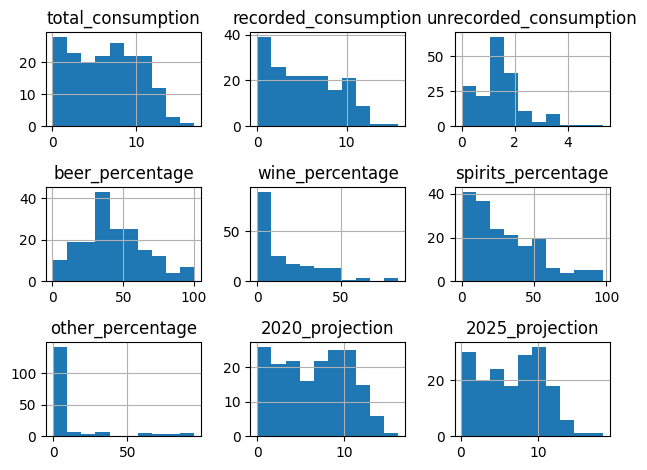

In [11]:
df.hist()
plt.tight_layout()

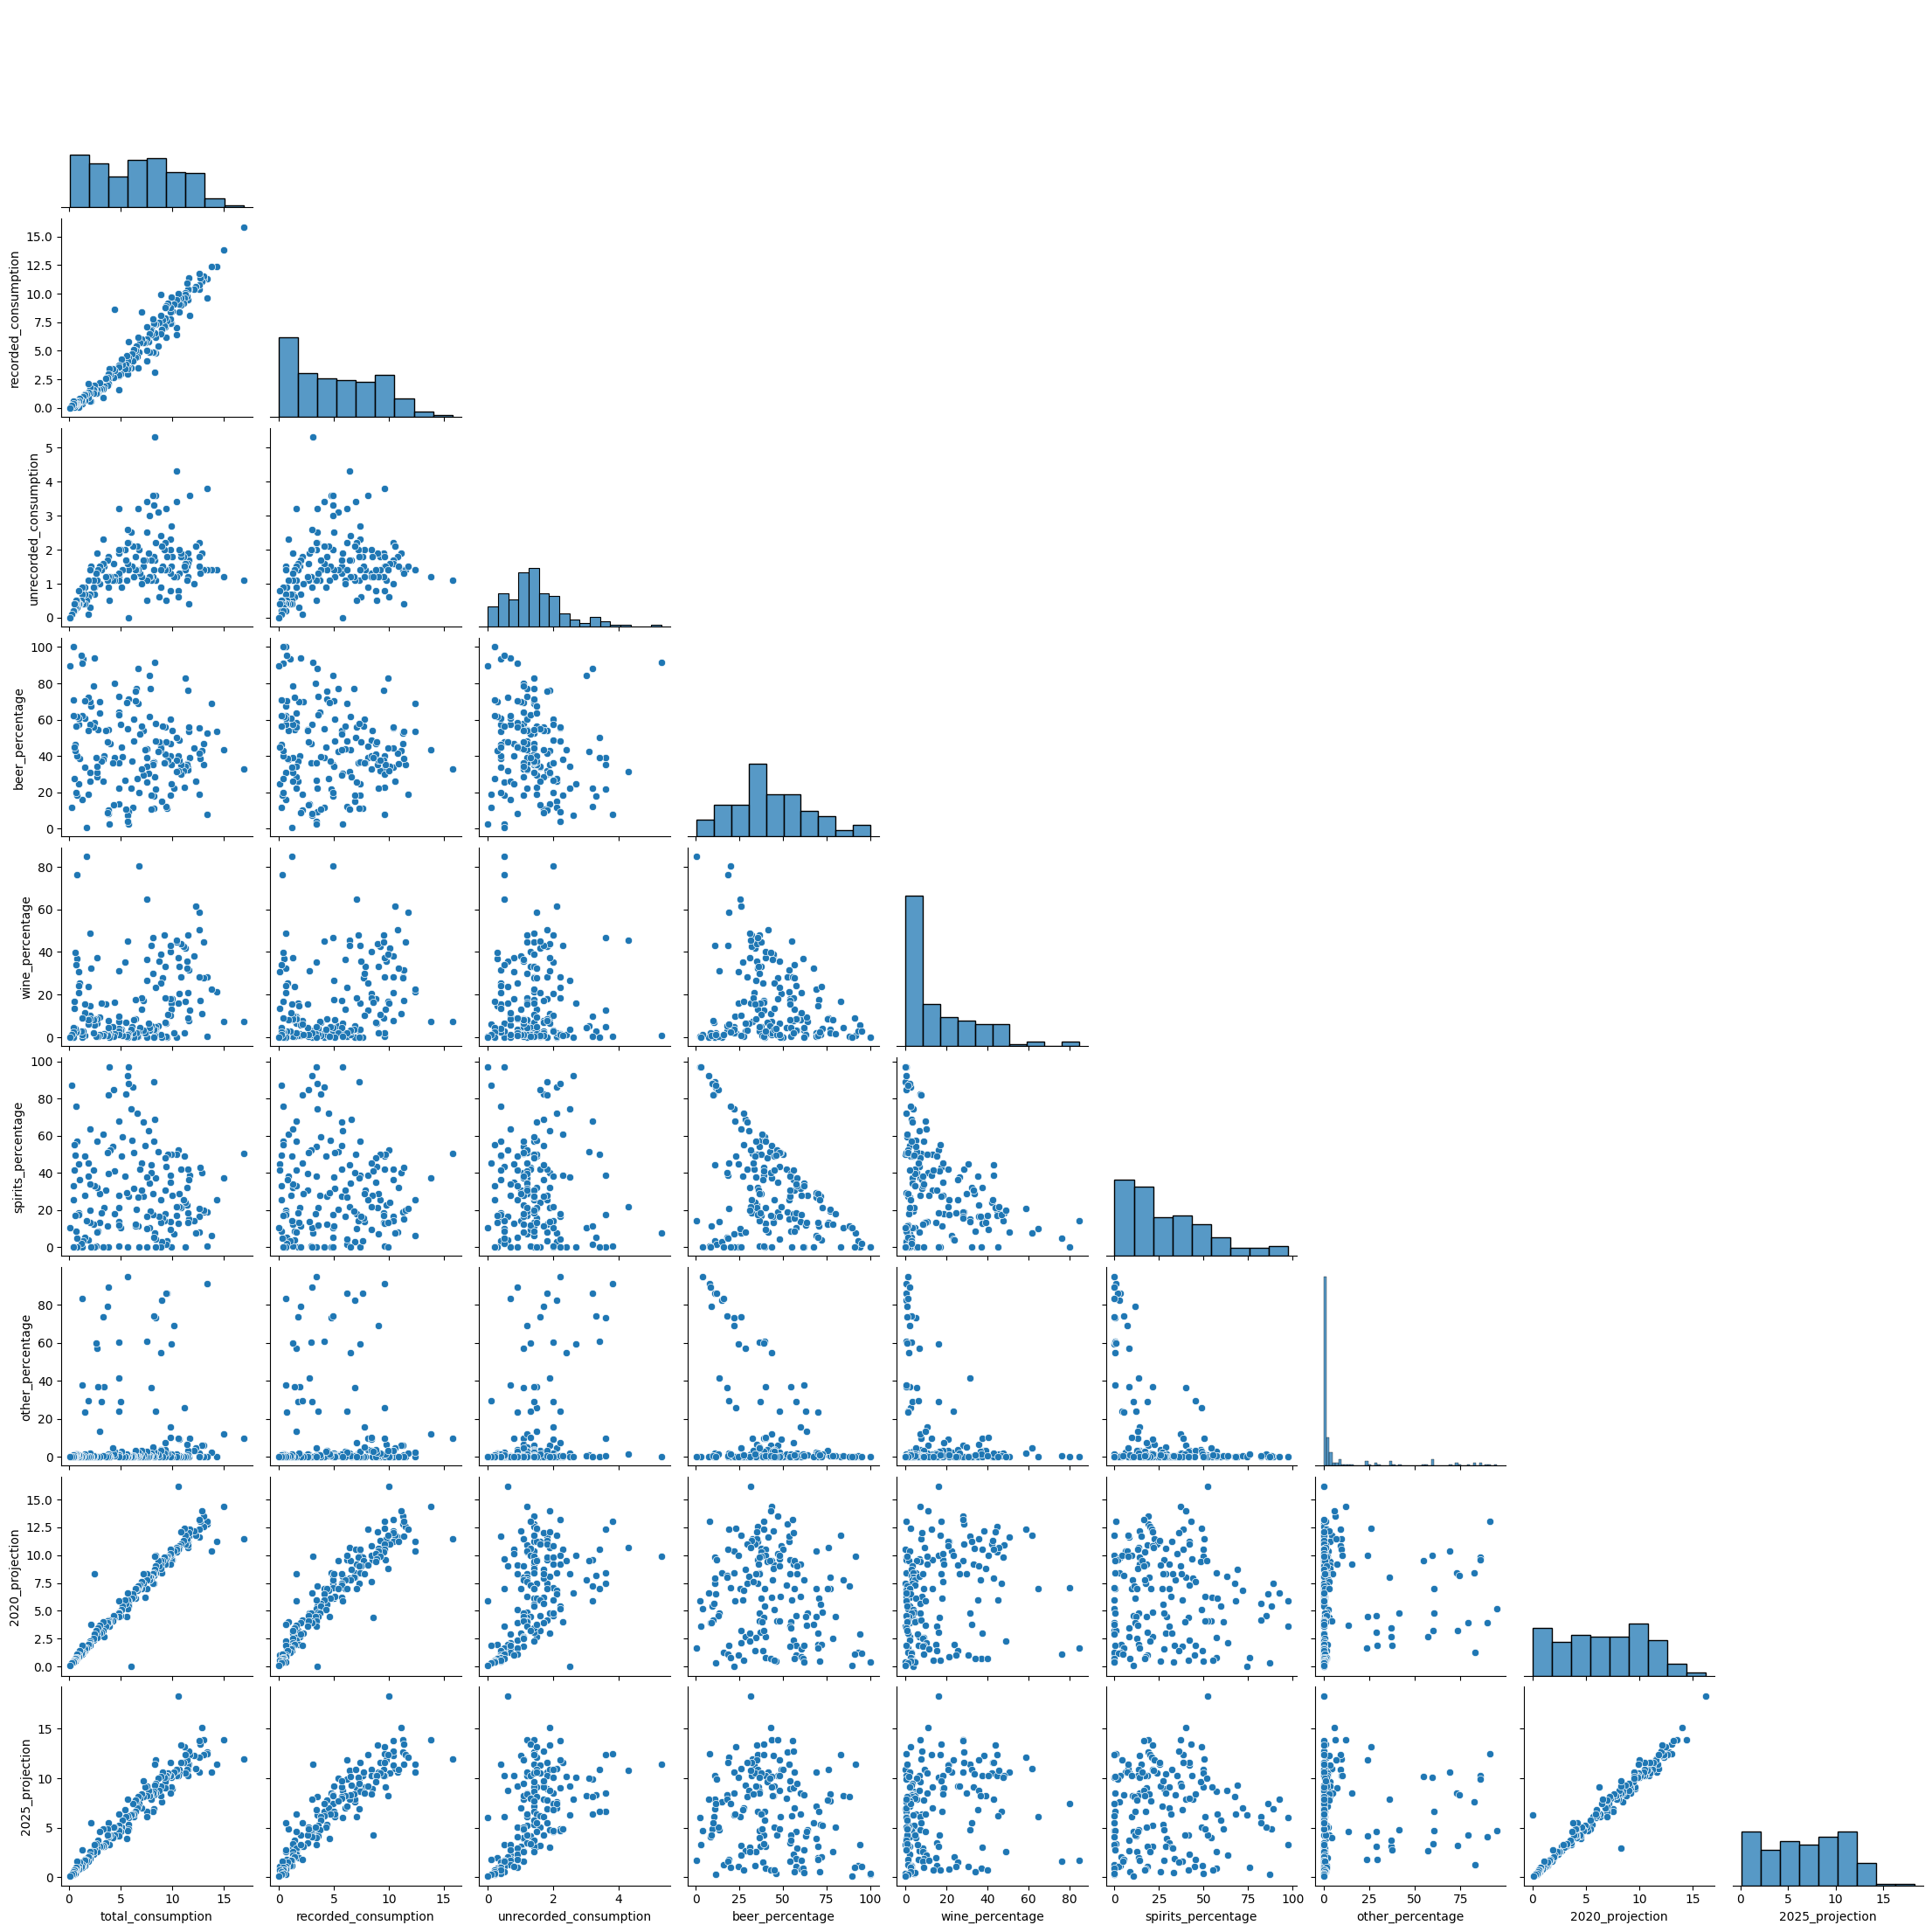

In [12]:
sns.pairplot(df, corner=True)

<AxesSubplot:>

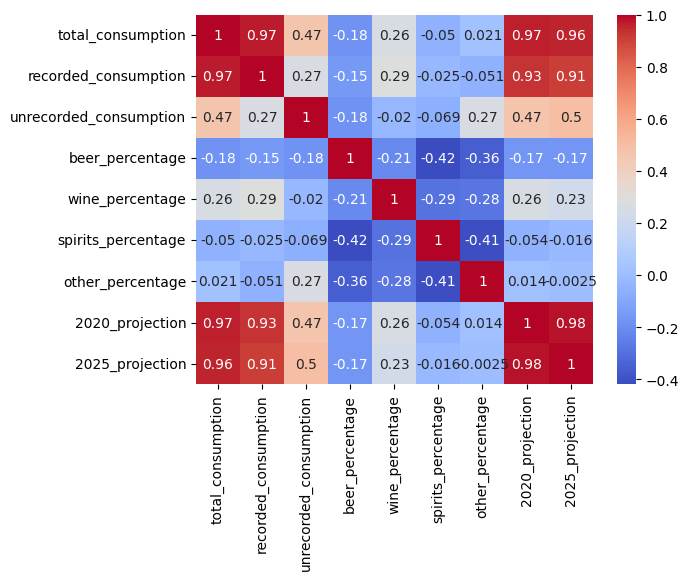

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [14]:
X = df.drop(columns={'2025_projection', 'country'})
y=df['2025_projection']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
LR_predictions=lr.predict(X_test)
print("Accuracy of Logistic Regression: {}%".format(lr.score(X_test, y_test) * 100 ), "%\n")
print(LR_predictions)

Accuracy of Logistic Regression: 91.52887750301574% %

[ 6.64501071 13.25497055  8.59452916  4.93214965  8.8311183  11.18452905
  3.43491793 11.10056819  8.28670973  1.81274492 10.19435504 10.8874143
  5.16942684  8.62596012  8.85415392 12.17454345  7.04117203  0.65260244
  8.36245131  5.45322936  2.83021849 11.17594497 13.20788516  4.6013103
  1.45098573 12.38166066  3.97951451  8.21824357  7.42642877  4.46823953
  6.15442611  0.66446501  6.43196048  8.25834012 12.20163517  4.7357137
  0.89348303 10.77797801 11.70200189  9.69890987  9.93412707  7.73050957
  6.82852332  9.13626581 10.00567509]


In [18]:
#Decision Tree Regression
dtr= DecisionTreeRegressor(random_state=5,max_depth=4)
dtr.fit(X_train,y_train)
DecisionTree_predictions=dtr.predict(X_test)
print("Accuracy of Decision Tree: {}%".format(dtr.score(X_test, y_test) * 100 ), "%\n")
print(DecisionTree_predictions)


Accuracy of Decision Tree: 89.83750149113426% %

[ 7.41       11.81875     8.2         4.79285714  8.2        10.41578947
  4.79285714 11.81875     8.2         2.7        10.41578947 10.41578947
  4.79285714  8.2         8.2        11.81875     5.96666667  1.06
  8.2         4.79285714  3.1        10.41578947 11.81875     4.79285714
  1.06       11.81875     4.79285714  8.2         7.41        4.79285714
  5.96666667  1.06        5.96666667  8.2        11.81875     4.79285714
  1.06       10.41578947 11.81875     9.         10.41578947  8.2
  7.41        9.         10.41578947]


In [19]:
RF = RandomForestRegressor(n_estimators=63)
RF.fit(X_train, y_train)
RF_predictions=RF.predict(X_test)
print("Accuracy of Random Forest: {}%".format(RF.score(X_test, y_test) * 100 ), "%\n")
print(RF_predictions)

Accuracy of Random Forest: 93.27104398086543% %

[ 7.79047619 12.54126984  8.11587302  4.71587302  8.45079365 10.71269841
  4.61904762 11.04444444  8.34285714  1.87619048 10.31428571 10.56031746
  5.18412698  8.26031746  8.61269841 12.21111111  6.11111111  1.03015873
  8.42698413  4.8968254   2.66825397 10.67142857 12.90634921  4.77619048
  1.12380952 11.70634921  4.50793651  8.18888889  7.19047619  4.84444444
  5.76349206  0.81428571  5.84126984  7.21746032 12.25873016  4.67460317
  1.04920635 10.51746032 11.27936508  8.80952381 10.44920635  7.97619048
  6.68253968  8.87936508 10.17936508]


In [20]:
LS = LassoCV()
LS.fit(X_train, y_train)
LS_predictions = LS.predict(X_test)
print("Accuracy of Lasso: {}%".format(LS.score(X_test, y_test) * 100 ), "%\n")
print(LS_predictions)


Accuracy of Lasso: 92.1427247590853% %

[ 6.9759352  12.56890226  8.24514772  4.88829762  8.52784254 10.98771737
  3.90519663 11.1270411   8.19314321  1.93827484 10.28691274 10.63568135
  5.16087221  8.51817425  8.87049995 12.26579282  6.35894209  0.98372862
  8.49227732  5.23517711  2.79673834 10.98798667 13.29946921  4.58975211
  1.6053897  12.32624283  3.91406889  7.61038178  7.12203941  4.41908359
  5.99834076  0.85289201  6.07636422  8.3410132  12.11188349  4.7731196
  1.35192994 10.78793109 11.6423946   9.40912694 10.02313725  7.69810008
  6.79172147  9.30048742  9.89206736]


In [21]:
RD = RidgeCV()
RD.fit(X_train, y_train)
RD_predictions=LS.predict(X_test)
print("Accuracy of Ridge: {}%".format(RD.score(X_test, y_test) * 100 ), "%\n")
print(RD_predictions)


Accuracy of Ridge: 92.02968802979456% %

[ 6.9759352  12.56890226  8.24514772  4.88829762  8.52784254 10.98771737
  3.90519663 11.1270411   8.19314321  1.93827484 10.28691274 10.63568135
  5.16087221  8.51817425  8.87049995 12.26579282  6.35894209  0.98372862
  8.49227732  5.23517711  2.79673834 10.98798667 13.29946921  4.58975211
  1.6053897  12.32624283  3.91406889  7.61038178  7.12203941  4.41908359
  5.99834076  0.85289201  6.07636422  8.3410132  12.11188349  4.7731196
  1.35192994 10.78793109 11.6423946   9.40912694 10.02313725  7.69810008
  6.79172147  9.30048742  9.89206736]


In [22]:
EL = ElasticNetCV()
EL.fit(X_train, y_train)
EL_predicitons=EL.predict(X_test)
print("Accuracy of Elastic Net: {}%".format(EL.score(X_test, y_test) * 100 ), "%\n")
print(EL_predicitons)

Accuracy of Elastic Net: 92.57172016458574% %

[ 6.88792456 12.76041839  8.3473121   4.88357209  8.59785735 11.11775024
  3.71047907 11.15328493  8.31348381  1.88110966 10.27101068 10.66766031
  5.16430121  8.48502451  8.87206294 12.18683768  6.51138603  0.85153264
  8.44724653  5.2686524   2.80537709 11.0341187  13.25519399  4.59247872
  1.55984482 12.33801501  3.89172106  7.90173283  7.20647719  4.42162286
  6.05464038  0.78266592  6.22742685  7.87747491 12.049448    4.78453474
  1.16664287 10.77282878 11.73591874  9.50584624  9.96558879  7.68277816
  6.8025377   9.2244375   9.97682515]
